# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [26]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhkar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NewsAPI_API_Key")

In [38]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [62]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc = "bitcoin"
btc_headlines = newsapi.get_top_headlines(q="bitcoin", language="en")
btc_headlines

{'status': 'ok',
 'totalResults': 1,
 'articles': [{'source': {'id': 'ars-technica', 'name': 'Ars Technica'},
   'author': 'Timothy B. Lee',
   'title': 'Microsoft engineer gets nine years for stealing $10M from Microsoft',
   'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
   'url': 'https://arstechnica.com/tech-policy/2020/11/microsoft-engineer-gets-nine-years-for-stealing-10m-from-microsoft/',
   'urlToImage': 'https://cdn.arstechnica.net/wp-content/uploads/2014/09/microsoft-640x215.jpg',
   'publishedAt': '2020-11-10T21:00:12+00:00',
   'content': '77 with 65 posters participating, including story author\r\nA former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store cred… [+3151 chars]'}]}

In [44]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_top_headlines(qintitle="ethereum", language="en")
eth_headlines

{'status': 'ok',
 'totalResults': 753,
 'articles': [{'source': {'id': 'buzzfeed', 'name': 'Buzzfeed'},
   'author': '[{"@type":"Person","name":"larryfitzmaurice","url":"https://www.buzzfeed.com/larryfitzmaurice","jobTitle":"BuzzFeed Staff"}]',
   'title': 'The "Gossip Girl" Reboot Has Officially Started Filming — No, Really',
   'description': 'XOXO.',
   'url': 'https://www.buzzfeed.com/larryfitzmaurice/gossip-girl-reboot-set-photos',
   'urlToImage': 'https://img.buzzfeed.com/buzzfeed-static/static/2020-11/11/4/campaign_images/f3f50a5fc486/the-gossip-girl-reboot-has-officially-started-fil-2-14993-1605070609-5_dblbig.jpg',
   'publishedAt': '2020-11-11T05:37:24.459329Z',
   'content': 'Keep up with the latest daily buzz with the BuzzFeed Daily newsletter!'},
  {'source': {'id': 'ign', 'name': 'IGN'},
   'author': None,
   'title': 'Destiny 2: Beyond Light - Find Truth Beyond The Tale Trailer - IGN',
   'description': "Watch the latest trailer for Destiny 2: Beyond Light, available no

In [53]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
 # Transform the response dictionary to a DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2020-11-10,"76 with 64 posters participating, including st...",-0.7964,0.0,0.213,0.787


In [46]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2020-11-11,Keep up with the latest daily buzz with the Bu...,0.0000,0.000,0.000,1.000
1,2020-11-11,Did you enjoy this video?,0.4939,0.444,0.000,0.556
2,2020-11-11,"By returning to CBD offices when safe, the ban...",0.7964,0.267,0.067,0.667
3,2020-11-11,The rotation from growth stocks to value and c...,0.8519,0.262,0.000,0.738
4,2020-11-11,The court action related to financial advice g...,-0.1531,0.038,0.055,0.907


In [54]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,1.0000,1.0,1.000,1.000
mean,-0.7964,0.0,0.213,0.787
std,NaN,NaN,NaN,NaN
min,-0.7964,0.0,0.213,0.787
25%,-0.7964,0.0,0.213,0.787
50%,-0.7964,0.0,0.213,0.787
75%,-0.7964,0.0,0.213,0.787
max,-0.7964,0.0,0.213,0.787


In [48]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,15.000000,15.000000,15.000000,15.000000
mean,0.215887,0.122133,0.035733,0.842200
std,0.468746,0.130385,0.043465,0.126282
min,-0.493900,0.000000,0.000000,0.556000
25%,-0.134250,0.017000,0.000000,0.763000
50%,0.000000,0.070000,0.000000,0.864000
75%,0.638650,0.194000,0.065000,0.933500
max,0.851900,0.444000,0.123000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [ ]:
#Q: Which coin had the highest mean positive score?

#A:Etherium had the highest mean positive score

#Q: Which coin had the highest compound score?

#A:Etherium had the highest compound score

#Q. Which coin had the highest positive score?

#A:Etherium had the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [96]:
import nltk
nltk.download("reuters")
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\bhkar\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [83]:
#Get BTC Sentences
btc_text = []
btc_text = (btc_df['text']) 
#btc_text = str(btc_text)
btc_sentence_tokenized = [sent_tokenize(i) for i in btc_text]
btc_sentence_tokenized


[['76 with 64 posters participating, including story author\r\nA former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store cred… [+3151 chars]']]

In [89]:
#Get ETH Sentences
eth_text = []
eth_text = (eth_df['text']) 
#eth_text = str(eth_text)
eth_sentence_tokenized = [sent_tokenize(i) for i in eth_text]
eth_sentence_tokenized


[['Keep up with the latest daily buzz with the BuzzFeed Daily newsletter!'],
 ['Did you enjoy this video?'],
 ['By returning to CBD offices when safe, the bank can "start again unlocking the benefits of in-person collaboration, such as better innovating for customers, learning from each other, problem solving … [+5791 chars]'],
 ['The rotation from growth stocks to value and cyclical shares on the back of an effective coronavirus vaccine may prove to be only a short-term phenomenon, according to broker Macquarie, which questio… [+3158 chars]'],
 ['The court action related to financial advice given to clients to invest or retain exposure to its troubled US Masters Residential Fund, or URF, which paid significant fees to related companies but pe… [+3281 chars]'],
 ['Florida Georgia Line is reportedly still a united front after a day of rumored drama.',
  'The country group is made up of Tyler Hubbard and Brian Kelley and is known for their hits "Meant to Be" and "Cr… [+2262 chars]'],
 ['

In [84]:
#print(word_tokenize(sent))
btc_word_tokenized = []

for story in btc_sentence_tokenized:
    # get all for each article, which is already sentence tokenized
    words = []
    for sent in story:
        words = words + word_tokenize(sent)
    # append all words for each article to the word_tokenized list
    btc_word_tokenized.append(words)
    
btc_word_tokenized

[['76',
  'with',
  '64',
  'posters',
  'participating',
  ',',
  'including',
  'story',
  'author',
  'A',
  'former',
  'Microsoft',
  'software',
  'engineer',
  'from',
  'Ukraine',
  'has',
  'been',
  'sentenced',
  'to',
  'nine',
  'years',
  'in',
  'prison',
  'for',
  'stealing',
  'more',
  'than',
  '$',
  '10',
  'million',
  'in',
  'store',
  'cred…',
  '[',
  '+3151',
  'chars',
  ']']]

In [90]:
#print(word_tokenize(sent))
eth_word_tokenized = []

for story in eth_sentence_tokenized:
    # get all for each article, which is already sentence tokenized
    words = []
    for sent in story:
        words = words + word_tokenize(sent)
    # append all words for each article to the word_tokenized list
    eth_word_tokenized.append(words)
    
eth_word_tokenized

[['Keep',
  'up',
  'with',
  'the',
  'latest',
  'daily',
  'buzz',
  'with',
  'the',
  'BuzzFeed',
  'Daily',
  'newsletter',
  '!'],
 ['Did', 'you', 'enjoy', 'this', 'video', '?'],
 ['By',
  'returning',
  'to',
  'CBD',
  'offices',
  'when',
  'safe',
  ',',
  'the',
  'bank',
  'can',
  '``',
  'start',
  'again',
  'unlocking',
  'the',
  'benefits',
  'of',
  'in-person',
  'collaboration',
  ',',
  'such',
  'as',
  'better',
  'innovating',
  'for',
  'customers',
  ',',
  'learning',
  'from',
  'each',
  'other',
  ',',
  'problem',
  'solving',
  '…',
  '[',
  '+5791',
  'chars',
  ']'],
 ['The',
  'rotation',
  'from',
  'growth',
  'stocks',
  'to',
  'value',
  'and',
  'cyclical',
  'shares',
  'on',
  'the',
  'back',
  'of',
  'an',
  'effective',
  'coronavirus',
  'vaccine',
  'may',
  'prove',
  'to',
  'be',
  'only',
  'a',
  'short-term',
  'phenomenon',
  ',',
  'according',
  'to',
  'broker',
  'Macquarie',
  ',',
  'which',
  'questio…',
  '[',
  '+3158',

In [99]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [65]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'day', 'week', 'also'}


In [102]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'day', 'week', 'also'}   
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    #re_clean = regex.sub('', text)
    # Create a list of words
    #words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    output = [word.lower() for word in words if word.lower() not in sw]
    return text


In [106]:
import nltk
nltk.download('stopwords')

result = tokenizer(btc_word_tokenized)
print(result)

[['76', 'with', '64', 'posters', 'participating', ',', 'including', 'story', 'author', 'A', 'former', 'Microsoft', 'software', 'engineer', 'from', 'Ukraine', 'has', 'been', 'sentenced', 'to', 'nine', 'years', 'in', 'prison', 'for', 'stealing', 'more', 'than', '$', '10', 'million', 'in', 'store', 'cred…', '[', '+3151', 'chars', ']']]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
result2 = eth_word_tokenized
print(result)

[['Keep', 'up', 'with', 'the', 'latest', 'daily', 'buzz', 'with', 'the', 'BuzzFeed', 'Daily', 'newsletter', '!'], ['Did', 'you', 'enjoy', 'this', 'video', '?'], ['By', 'returning', 'to', 'CBD', 'offices', 'when', 'safe', ',', 'the', 'bank', 'can', '``', 'start', 'again', 'unlocking', 'the', 'benefits', 'of', 'in-person', 'collaboration', ',', 'such', 'as', 'better', 'innovating', 'for', 'customers', ',', 'learning', 'from', 'each', 'other', ',', 'problem', 'solving', '…', '[', '+5791', 'chars', ']'], ['The', 'rotation', 'from', 'growth', 'stocks', 'to', 'value', 'and', 'cyclical', 'shares', 'on', 'the', 'back', 'of', 'an', 'effective', 'coronavirus', 'vaccine', 'may', 'prove', 'to', 'be', 'only', 'a', 'short-term', 'phenomenon', ',', 'according', 'to', 'broker', 'Macquarie', ',', 'which', 'questio…', '[', '+3158', 'chars', ']'], ['The', 'court', 'action', 'related', 'to', 'financial', 'advice', 'given', 'to', 'clients', 'to', 'invest', 'or', 'retain', 'exposure', 'to', 'its', 'troubled

In [109]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc_df['tokens']=result
btc_df

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-10,"76 with 64 posters participating, including st...",-0.7964,0.0,0.213,0.787,"[76, with, 64, posters, participating, ,, incl..."


In [111]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
eth_df['tokens']=result2
eth_df

#HOORAY

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-11,Keep up with the latest daily buzz with the Bu...,0.0000,0.000,0.000,1.000,"[Keep, up, with, the, latest, daily, buzz, wit..."
1,2020-11-11,Did you enjoy this video?,0.4939,0.444,0.000,0.556,"[Did, you, enjoy, this, video, ?]"
2,2020-11-11,"By returning to CBD offices when safe, the ban...",0.7964,0.267,0.067,0.667,"[By, returning, to, CBD, offices, when, safe, ..."
3,2020-11-11,The rotation from growth stocks to value and c...,0.8519,0.262,0.000,0.738,"[The, rotation, from, growth, stocks, to, valu..."
4,2020-11-11,The court action related to financial advice g...,-0.1531,0.038,0.055,0.907,"[The, court, action, related, to, financial, a..."
5,2020-11-11,Florida Georgia Line is reportedly still a uni...,0.4215,0.070,0.000,0.930,"[Florida, Georgia, Line, is, reportedly, still..."
6,2020-11-11,image copyrightGetty Images\r\nChina has propo...,-0.2500,0.051,0.081,0.868,"[image, copyrightGetty, Images, China, has, pr..."
7,2020-11-11,Democrats clinched two more years of controlli...,-0.1154,0.000,0.045,0.955,"[Democrats, clinched, two, more, years, of, co..."
8,2020-11-11,Indias governing party and its allies have won...,0.7506,0.176,0.000,0.824,"[Indias, governing, party, and, its, allies, h..."
9,2020-11-11,Health and Human Services Secretary Alex Azar ...,0.0000,0.000,0.000,1.000,"[Health, and, Human, Services, Secretary, Alex..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [112]:
from collections import Counter
from nltk import ngrams

In [128]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigram_counts = Counter(ngrams(btc_df['tokens'], n=2))
print(dict(bigram_counts))
#I tried this both ways (see below) and the code should work/reflects the Instructor example. Proceeding

{}


In [135]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counts2 = Counter(ngrams(eth_word_tokenized, n=2))
print(dict(bigram_counts2))
#I tried this both ways (see above) and the code should work/reflects the Instructor example. Unhashable type: list. Proceeding

TypeError: unhashable type: 'list'

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [133]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
print(dict(bigram_counts.most_common(10)))

{}


In [136]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
print(dict(bigram_counts2.most_common(10)))

NameError: name 'bigram_counts2' is not defined

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

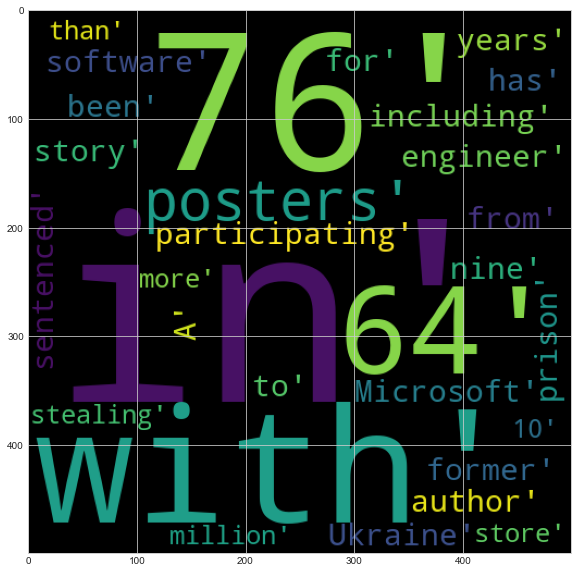

In [141]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud(width=500, height=500, max_words=30).generate(str(btc_word_tokenized))
plt.imshow(wc)
#Stop words not applied? -Bjorn

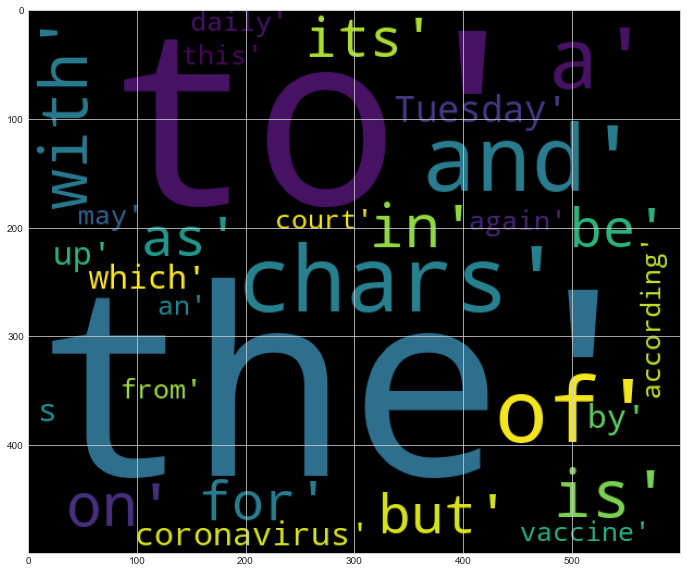

In [145]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud(width=600, height=500, max_words=30).generate(str(result2))
plt.imshow(wc)
#Stop words not applied? Tokenizer function must not have worked. Proceeding -Bjorn

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [146]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [147]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [162]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
b = btc_df['tokens'].tolist()
str(b)

"[['76', 'with', '64', 'posters', 'participating', ',', 'including', 'story', 'author', 'A', 'former', 'Microsoft', 'software', 'engineer', 'from', 'Ukraine', 'has', 'been', 'sentenced', 'to', 'nine', 'years', 'in', 'prison', 'for', 'stealing', 'more', 'than', '$', '10', 'million', 'in', 'store', 'cred…', '[', '+3151', 'chars', ']']]"

In [164]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(str(b))
# Add a title to the document
# YOUR CODE HERE!


In [165]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [167]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Ukraine']


---

## Ethereum NER

In [168]:
# Concatenate all of the eth text together
# YOUR CODE HERE!
e = eth_df['tokens'].tolist()
str(e)

'[[\'Keep\', \'up\', \'with\', \'the\', \'latest\', \'daily\', \'buzz\', \'with\', \'the\', \'BuzzFeed\', \'Daily\', \'newsletter\', \'!\'], [\'Did\', \'you\', \'enjoy\', \'this\', \'video\', \'?\'], [\'By\', \'returning\', \'to\', \'CBD\', \'offices\', \'when\', \'safe\', \',\', \'the\', \'bank\', \'can\', \'``\', \'start\', \'again\', \'unlocking\', \'the\', \'benefits\', \'of\', \'in-person\', \'collaboration\', \',\', \'such\', \'as\', \'better\', \'innovating\', \'for\', \'customers\', \',\', \'learning\', \'from\', \'each\', \'other\', \',\', \'problem\', \'solving\', \'…\', \'[\', \'+5791\', \'chars\', \']\'], [\'The\', \'rotation\', \'from\', \'growth\', \'stocks\', \'to\', \'value\', \'and\', \'cyclical\', \'shares\', \'on\', \'the\', \'back\', \'of\', \'an\', \'effective\', \'coronavirus\', \'vaccine\', \'may\', \'prove\', \'to\', \'be\', \'only\', \'a\', \'short-term\', \'phenomenon\', \',\', \'according\', \'to\', \'broker\', \'Macquarie\', \',\', \'which\', \'questio…\', \

In [169]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc2 = nlp(str(e))
# Add a title to the document
# YOUR CODE HERE!

In [171]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc2, style='ent')

In [37]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc2.ents if ent.label_ == 'GPE'])

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f